#Friday Special : Predictive Modeling |#DS360withAkanksha
#Stock Price Prediction

In [1]:
#Importing libraries

import numpy as np     #To apply mathematical functions & opertations
import matplotlib.pyplot as plt #For Visualization purpose
import pandas as pd #For Data Analysis & Manipulation
import datetime #To work with date & dates observations

In [2]:
stockdata = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)

In [3]:
stockdata.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#To detect missing values

stockdata.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


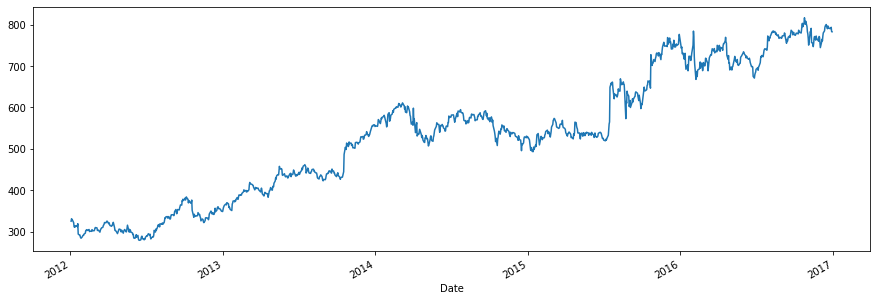

In [6]:
stockdata['Open'].plot(figsize=(15,5))

In [7]:
#Converting column "a" of a DataFrame

stockdata["Close"] = stockdata["Close"].str.replace(',', '').astype(float)


In [8]:
stockdata["Volume"] = stockdata["Volume"].str.replace(',', '').astype(float)

In [9]:
# Calculating 7 days rolling mean in iterations, hence 1st 6 won't be calculated

stockdata.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


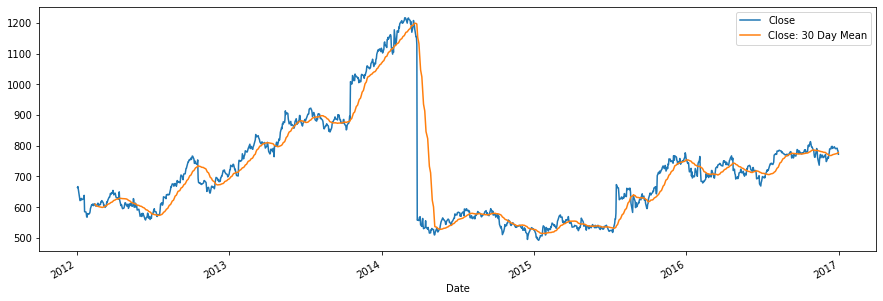

In [12]:
stockdata['Close: 30 Day Mean'] = stockdata['Close'].rolling(window=30).mean()
stockdata[['Close','Close: 30 Day Mean']].plot(figsize=(15,5))

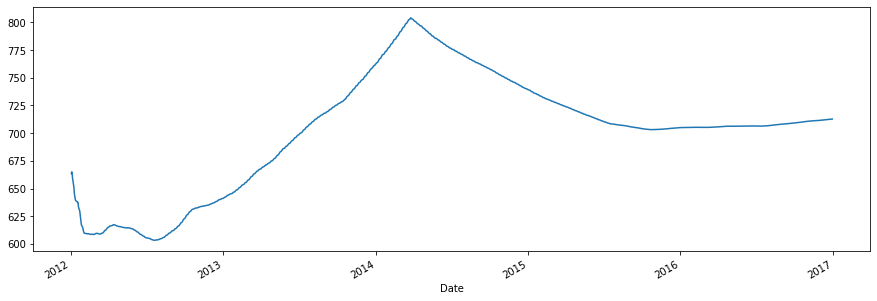

In [13]:
# specifying a minimum number of periods to be 1 in 30 days period

stockdata['Close'].expanding(min_periods=1).mean().plot(figsize=(15,5))



In [14]:
training_set=stockdata['Open']
training_set=pd.DataFrame(training_set)


In [15]:
# Feature Scaling starts here

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [16]:
# To forecast the 61st day stockprice, Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
# Phase 2 - LSTM Architecture | Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [20]:
# Initialising the RNN
regressor = Sequential()

In [21]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [22]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0515
Epoch 2/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0061
Epoch 4/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0054
Epoch 5/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0054
Epoch 7/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [==============================] - 3s 2ms/step - l

In [26]:
#Phase 3 - Making Predictions

# Getting the real stock price of 2017
stockdata_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

In [27]:
real_stock_price = stockdata_test.iloc[:, 1:2].values

In [28]:
stockdata_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [29]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [30]:
stockdata_test["Volume"] =stockdata_test["Volume"].str.replace(',', '').astype(float)

In [31]:
test_set=stockdata_test['Open']
test_set=pd.DataFrame(test_set)

In [32]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [33]:
# Getting the predicted stock price of 2017
stockdata_total = pd.concat((stockdata['Open'], stockdata_test['Open']), axis = 0)
inputs = stockdata_total[len(stockdata_total) - len(stockdata_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [34]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


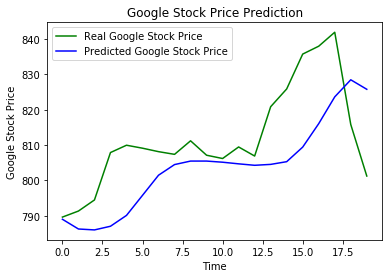

In [35]:
# Phase 4 : Visualizing the data

plt.plot(real_stock_price, color = 'green', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
# Conclusion : Looks like our model is doing great in making predictions 